In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [7]:
data_orig = pd.read_csv(os.path.join(os.path.abspath('Brain_GSE50161.csv')),header=0,sep=',')

print('data_orig shape:',data_orig.shape)
data_orig.head()

data_orig shape: (130, 54677)


,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,838,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450


In [8]:
print(data_orig["type"].unique())

['ependymoma' 'glioblastoma' 'medulloblastoma' 'normal'
 'pilocytic_astrocytoma']


In [9]:
data = data_orig.drop("type", axis=1)
print(f"original shape: {data_orig.shape}")
print(f"new shape: {data.shape}")

original shape: (130, 54677)
new shape: (130, 54676)


### Visualization of cancer classes

In [41]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data_without_target = data_orig.drop(columns=['type'])
pca_class = PCA(n_components=2)
pca_class.fit(data_without_target)

print(f"explained_variance_ratio_ = {pca_class.explained_variance_ratio_}")
print(f"precent of lost inforamtion = {100 - 100*np.sum(pca_class.explained_variance_ratio_):.2f}%")
print(f"explained_variance_ = {pca_class.explained_variance_}")

std_scaler_class = StandardScaler()
std_scaler_class.fit(data_without_target)
data_std = std_scaler_class.transform(data_without_target)

pca_class_std = PCA(n_components=2)
pca_class_std.fit(data_std)

print(f"Using scaled data:")
print(f"explained_variance_ratio_ = {pca_class_std.explained_variance_ratio_}")
print(f"precent of lost inforamtion = {100 - 100*np.sum(pca_class_std.explained_variance_ratio_):.2f}%")
print(f"explained_variance_ = {pca_class_std.explained_variance_}")

explained_variance_ratio_ = [0.18146888 0.14084652]
precent of lost inforamtion = 67.77%
explained_variance_ = [5296.52565858 4110.88239532]
Using scaled data:
explained_variance_ratio_ = [0.22404908 0.07916542]
precent of lost inforamtion = 69.68%
explained_variance_ = [12345.0695589   4362.00235695]


explained_variance_ratio_ = [0.18146888 0.14084652]
precent of lost inforamtion = 67.77%
explained_variance_ = [5296.52565858 4110.88239532]
Using scaled data:
explained_variance_ratio_ = [0.22404908 0.07916542]
precent of lost inforamtion = 69.68%
explained_variance_ = [12345.0695589   4362.00235694]


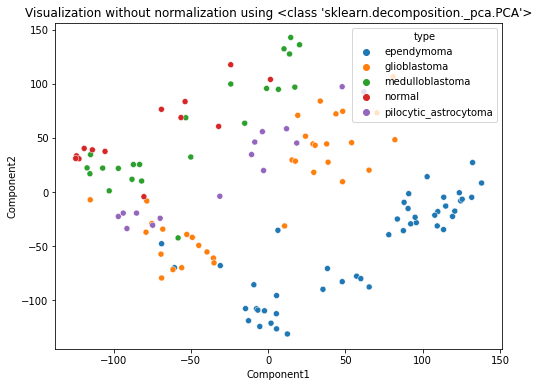

In [58]:
def visualize_data(data, types, method, title):
    components = pd.DataFrame(method.fit_transform(data), columns = ['Component1','Component2'])
    components['type'] = types

    fig, ax = plt.subplots()
    fig.set_size_inches((8,6))
    scatterplt = sns.scatterplot(data = components, x ='Component1', y='Component2', hue = 'type')
    scatterplt.set(title=title)

def show_dimensionality_reduction(method, n_components, data, types, print_pca_info=False, normalization=False):
    data_without_target = data.drop(columns=['type'])
    method_model = method(n_components=n_components)
    method_model.fit(data_without_target)

    if print_pca_info:
        print(f"explained_variance_ratio_ = {method_model.explained_variance_ratio_}")
        print(f"precent of lost inforamtion = {100 - 100*np.sum(method_model.explained_variance_ratio_):.2f}%")
        print(f"explained_variance_ = {method_model.explained_variance_}")

    std_scaler_model = StandardScaler()
    std_scaler_model.fit(data_without_target)
    data_std = std_scaler_model.transform(data_without_target)

    method_model_std = method(n_components=2)
    method_model_std.fit(data_std)

    if print_pca_info:
        print(f"Using scaled data:")
        print(f"explained_variance_ratio_ = {method_model_std.explained_variance_ratio_}")
        print(f"precent of lost inforamtion = {100 - 100*np.sum(method_model_std.explained_variance_ratio_):.2f}%")
        print(f"explained_variance_ = {method_model_std.explained_variance_}")
    

    visualize_data(data=data_without_target, types = types, method=method_model, 
        title=f"Visualization without normalization using {method}")
    if normalization:
        visualize_data(data=data_std, types = types, method=method_model_std,
            title=f"Visualization with normalization using {method}")

show_dimensionality_reduction(PCA, n_components=2, data=data_orig, types=data_orig['type'], print_pca_info=True)

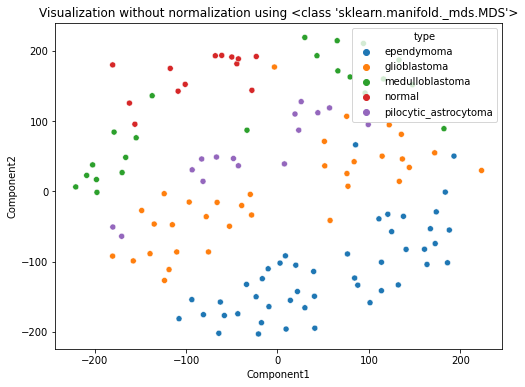

In [59]:
from sklearn.manifold import MDS
show_dimensionality_reduction(MDS, n_components=2, data=data_orig, types=data_orig['type'])

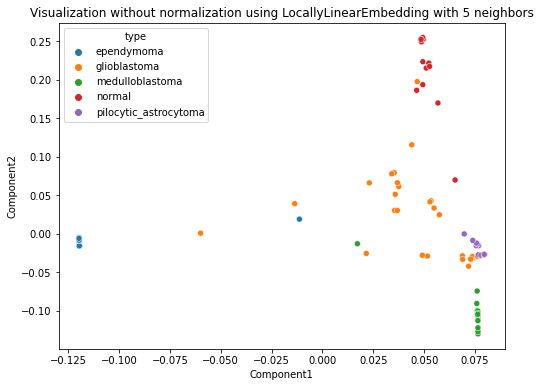

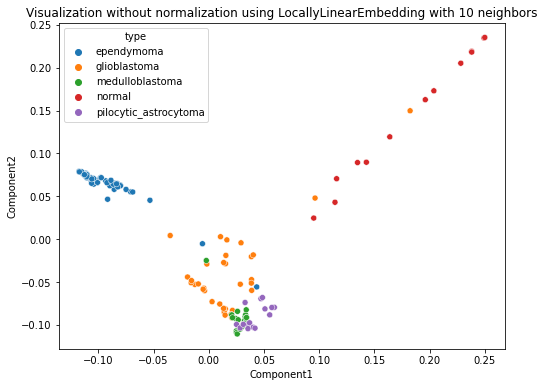

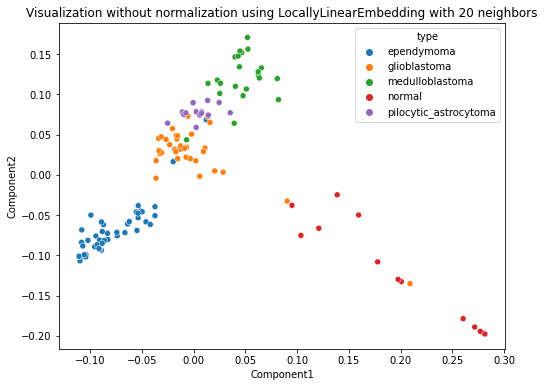

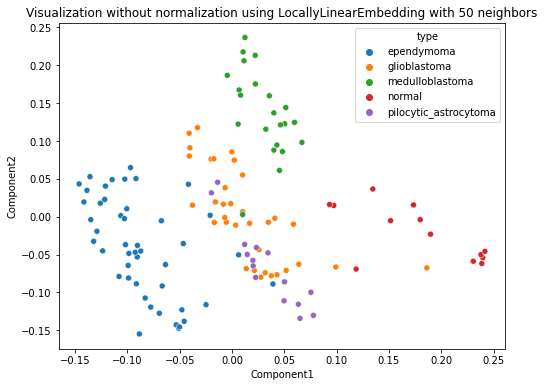

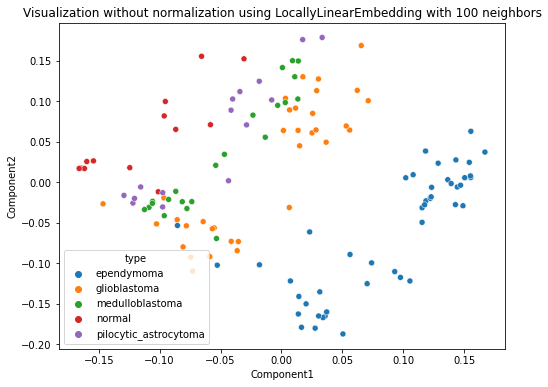

In [68]:
from sklearn.manifold import LocallyLinearEmbedding
data_without_target = data_orig.drop(columns=['type'])
n_neighbors = [5,10,20,50,100]
for n in n_neighbors: 
    method_model = LocallyLinearEmbedding(n_components=2, method='standard', n_neighbors=n)
    method_model.fit(data_without_target)

    visualize_data(data=data_without_target, types = data_orig['type'], method=method_model, 
        title=f"Visualization without normalization using LocallyLinearEmbedding with {n} neighbors")
    plt.show()



/home/jam/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/jam/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/jam/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/jam/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


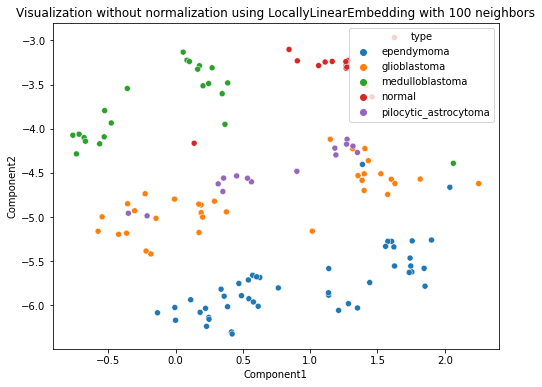

In [71]:
from sklearn.manifold import TSNE

data_without_target = data_orig.drop(columns=['type'])
method_model = TSNE(n_components=2, perplexity=100)
method_model.fit(data_without_target)

visualize_data(data=data_without_target, types = data_orig['type'], method=method_model, 
    title=f"Visualization without normalization using LocallyLinearEmbedding with {n} neighbors")
plt.show()


### Using PCA to reduce dimensionality with different levels of information loss

In [82]:
levels = np.array([80, 85, 90, 95, 97, 99, 99.99], dtype=np.float64)/100
print(f"Total number of dimensions = {data_orig.drop(columns=['type']).shape[1]}")
print(f'Levels: {levels}')

pca = PCA()
pca.fit(data_orig.drop(columns=['type']))

for lvl in levels:
    explained = 0
    for i in range(len(pca.explained_variance_ratio_)):
        explained += pca.explained_variance_ratio_[i]
        if explained >= lvl:
            break
    print(f'For level {lvl} we need {i+1} dimensions')

Total number of dimensions = 54676
Levels: [0.8    0.85   0.9    0.95   0.97   0.99   0.9999]
For level 0.8 we need 30 dimensions
For level 0.85 we need 42 dimensions
For level 0.9 we need 59 dimensions
For level 0.95 we need 83 dimensions
For level 0.97 we need 97 dimensions
For level 0.99 we need 115 dimensions
For level 0.9998999999999999 we need 129 dimensions


## Finding the relevant genes

In [85]:
from sklearn.model_selection import train_test_split, StratifiedKFold, ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, auc, classification_report, confusion_matrix
from tensorflow import keras
from pandas.plotting import scatter_matrix
import seaborn as sn
from sklearn.preprocessing import OneHotEncoder
from IPython.display import display

classes = data_orig.type.unique().tolist()
x_data = data_orig.drop(['samples', 'type'], axis = 1).values
y_data = data_orig.type.values
func = lambda x : classes.index(x)
y_data = np.asarray([func(i) for i in y_data], dtype = "float32")

In [ ]:
def KFold_Training(model, model_name, color):
    onehc = OneHotEncoder(sparse=False)
    global tpr, fpr, roc_auc, x_data, y_data, colors, model_names
    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
    print("Cross Val Score : ", cross_val_score(model, x_data, y_data, cv = cv, scoring = "f1_macro"))
    stratify_kfold = StratifiedKFold(shuffle = True, random_state = 42)
    s_kf = []
    for train_index, val_index in stratify_kfold.split(x_data, y_data):
        x, x_val = x_data[train_index], x_data[val_index]
        y, y_val = y_data[train_index], y_data[val_index]
        model.fit(x, y)
        s_kf.append(model.score(x_val, y_val))
    print(f"\nStratifiedKFold Score : {s_kf}")
    print(classification_report(y_data, model.predict(x_data)))
    display(sn.heatmap(confusion_matrix(y_data, model.predict(x_data)), annot = True))
    
    
    return model

In [86]:
def plot_important_features(model, limiter):
    global dataset, classes
    indexes = np.where(model.feature_importances_ >= np.max(model.feature_importances_) / limiter)
    features = dataset.columns[indexes[0]]
    importancies = np.array(model.feature_importances_[indexes[0]])
    inds = importancies.argsort()
    features = features[inds][-10:]
    importancies = importancies[inds][-10:]
    print("Features                  Importancies", end = "\n\n")
    for feature, importancy in zip(features, importancies):
        print(feature, "       ", importancy)
    fig, ax = plt.subplots(figsize = (15, 10))
    ax.bar(features, importancies)
    ax.set_ylabel('Importance')
    ax.set_xlabel('Features')
    plt.tight_layout()
    plt.show()
    
    #"Plotting Bar Plot for Every Important Feature"
    df = pd.DataFrame()
    df = dataset[features]
    df.hist(figsize = (20, 20))
    df['type'] = np.array(list(map(lambda x : classes.index(x), dataset['type'].values)),
                          dtype = "float32")
    
    #"Plotting Correlation Graphs for Every Important Feature and Label"
    scatter_matrix(df, figsize = (20, 20))
    
    print("Correlation of Type with every other Important Feature")
    display(df.corr()["type"].sort_values(ascending = False))

In [87]:
def plot_corr_matrix(indexes, importancies):
    global dataset, classes
    features = dataset.columns[indexes]    
    fig, ax = plt.subplots(figsize = (15, 10))
    ax.bar(features, importancies)
    plt.tight_layout()
    plt.show()
    
    #"Plotting Bar Plot for Every Important Feature"
    df = pd.DataFrame()
    df = dataset[features]
    df.hist(figsize = (20, 20))
    df['type'] = np.array(list(map(lambda x : classes.index(x), dataset['type'].values)),
                          dtype = "float32")
    
    #"Plotting Correlation Graphs for Every Important Feature and Label"
    scatter_matrix(df, figsize = (20, 20))
    
    print("Correlation of Type with every other Important Feature")
    display(df.corr()["type"].sort_values(ascending = False))

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, ShuffleSplit, RandomizedSearchCV

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, random_state = 42, shuffle = True, stratify = y_data)

/home/jam/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/jam/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 678, in _fit_and_score
    estimator.fit(X_train, **fit_params)
TypeError: fit() missing 1 required positional argument: 'y'

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/home/jam/.local/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=100. Running 1 iterations. For exhaustive s

Cross Val Score :  [0.88057971 1.         0.84633053 0.89401629 0.94848485 0.96273292
 0.98217469 0.89843443 0.90152647 0.97925926]


/home/jam/.local/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=100. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/home/jam/.local/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=100. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/home/jam/.local/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=100. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/home/jam/.local/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=100. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/home/jam/.local/lib/python3.9/site-pack


StratifiedKFold Score : [1.0, 0.9615384615384616, 0.9615384615384616, 0.8846153846153846, 0.9230769230769231]
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        46
         1.0       0.97      0.97      0.97        34
         2.0       1.00      1.00      1.00        22
         3.0       0.93      1.00      0.96        13
         4.0       0.93      0.93      0.93        15

    accuracy                           0.98       130
   macro avg       0.97      0.98      0.97       130
weighted avg       0.98      0.98      0.98       130



<AxesSubplot:>

Best Params For Random Forest : {'random_state': 46, 'n_estimators': 550, 'min_samples_split': 0.2, 'min_samples_leaf': 7, 'max_features': 'auto', 'max_depth': 12, 'criterion': 'gini', 'class_weight': 'balanced_subsample'}

OOB_Score : 0.9519230769230769



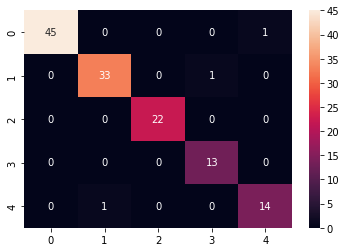

In [94]:
rf = RandomForestClassifier(oob_score = True, n_jobs = -1, verbose = 0)
erf = ExtraTreesClassifier(oob_score = True, n_jobs = -1, verbose = 0)
scores = cross_val_score(rf, data_orig)

random_grid = {'criterion' : ["gini"],
               'max_depth' : [12],
               'min_samples_split' : [0.2],
               'min_samples_leaf' : [7],
               'n_estimators' : [550],
               'max_features' : ["auto"],
               'class_weight' : ["balanced_subsample"],
              'random_state' : [46]}
rcv = RandomizedSearchCV(estimator = rf,
                         param_distributions = random_grid,
                         n_iter = 100, cv = 5, verbose=0, random_state=35, n_jobs = -1)

rcv = KFold_Training(rcv, "Random Forest", 'darkorange')
rf = rcv.best_estimator_
print("Best Params For Random Forest : ", end = str(rcv.best_params_))
print(f"\n\nOOB_Score : {rf.oob_score_}", end = "\n\n")

In [ ]:
plot_important_features(rf, 2)